# Supernova Signal - 3
Investigate different sampling

## Table of Contents
- [2D Rates](#rates)
- [Plotting](#plot-data)
    - [Recoil Energy Spectrum 1D](#recoil-spec2D)
    - [Recoil Energy Spectrum 2D](#recoil-spec2D)

# Read model and 2D recoil rates<a class="anchor" id="rates"></a>

In [5]:
import numpy as np
import multimessenger.supernova as sn
M30sn_model  = sn.Supernova_Models.SN_LightCurve()
M30sn_model.load_model_from_db(progenitor_mass = 30,
                               metallicity= 0.02,
                               time_of_revival = 100,)

Retrieving object /dali/lgrandi/melih/mma/data/Xenon_30-M_-0.02-Z_100-t_dist10.p
Object was found! 
To save manually: save_object(filename, update=True)



In [6]:
M30sn_model.get_recoil_spectra1D(rec_en = np.linspace(0,20,35))
M30sn_model.get_recoil_spectra2D()

Retrieving object /dali/lgrandi/melih/mma/data/Xenon_30-M_-0.02-Z_100-t_dist10_Er0.0-20.0-35_t0-0-tf-10_1D.p
Retrieving object /dali/lgrandi/melih/mma/data/Xenon_30-M_-0.02-Z_100-t_dist10_Er0.0-15.3-27_tstep1_dist10_2D.p


### Sample and plot the data<a class="anchor" id="plot-data"></a>

In [4]:
plotter = Plotter(M30sn_model)

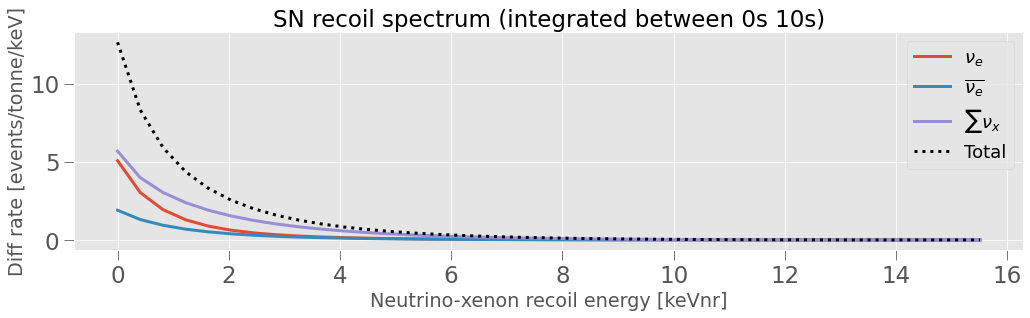

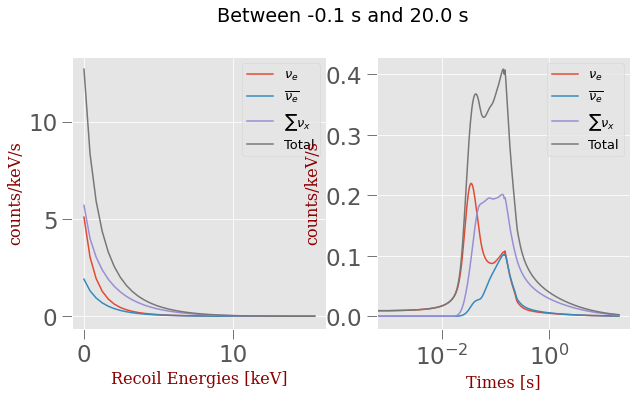

In [5]:
plotter.plot_recoil_spectra();
plotter.plot_recoil_spectra2D(integrated=True, figsize=(10,5));

#### Sample from 1D spectrum

Worked!


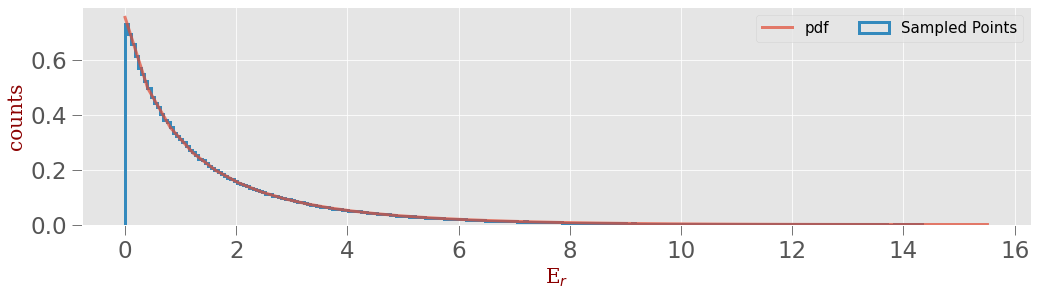

In [6]:
fig, ax, samples = plotter.plot_sampled_energies()

#### Sample from 2D spectra

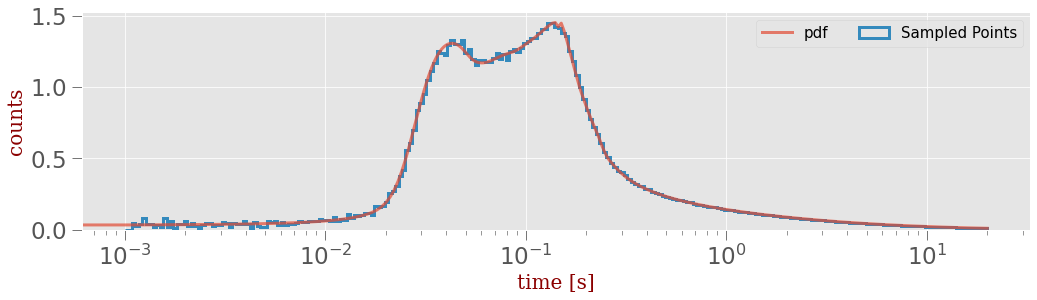

In [7]:
plotter.plot_sampled_energies(x='time', xscale='log');

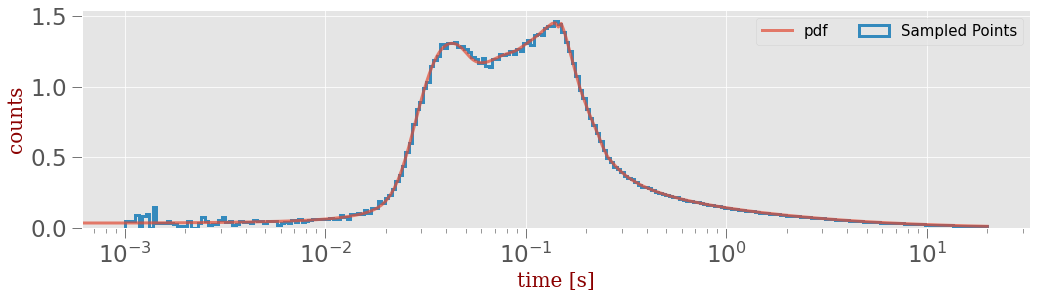

In [8]:
fig, ax, _ = plotter.plot_sampled_energies(x='time', xscale='log');

#### Object attributes

In [7]:
tot_rates1D = M30sn_model.total_rate1D # integrated(summed) between 0-10s 
tot_rates2D = M30sn_model.total_rate2D
recoil_energy_bins = M30sn_model.recoil_en
timebins = M30sn_model.t
nu_energies = M30sn_model.mean_E
rates_Er, rates_t = M30sn_model._get_1Drates_from2D()
Er_sample_E = M30sn_model.sample_from_recoil_spectrum(N_sample=100000)
Er_sample_t = M30sn_model.sample_from_recoil_spectrum(x='time',N_sample=100000)

### Signal at the Detector

In [10]:
from multimessenger.supernova.Simulate_Signal import Simulator
simulator = Simulator('test')

*** Detector definition message ***
You are currently using the default XENON10 template detector.



/home/melih/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


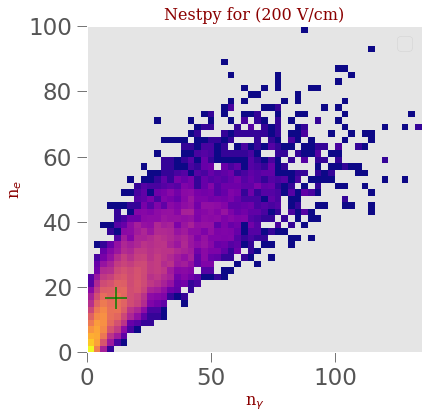

In [11]:
sampled_energies = M30sn_model.sample_from_recoil_spectrum(N_sample=50000)
simulator.simulate_quanta(sampled_energies, plot=True);

In [18]:
## Needs to be updated based on nestpy
# simulator.Plot_S1S2(sampled_energies);

See **Luminosity plots** and **Number Flux Plots** in the [previous notebook](Supernova_Signal-1.ipynb)